In [1]:
!pip install lazypredict
!pip install scipy==1.7.1

     |████████████████████████████████| 25.9 MB 38.6 MB/s 
     |████████████████████████████████| 302 kB 44.3 MB/s 
     |████████████████████████████████| 14.5 MB 1.3 MB/s 
     |████████████████████████████████| 72 kB 395 kB/s 
     |████████████████████████████████| 127.6 MB 18 kB/s 
     |████████████████████████████████| 269 kB 10.9 MB/s 
     |████████████████████████████████| 248 kB 44.6 MB/s 
     |████████████████████████████████| 10.1 MB 17.8 MB/s 
     |████████████████████████████████| 6.8 MB 27.3 MB/s 
     |████████████████████████████████| 1.2 MB 26.2 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=d3c6d89837e040aa583d038870ea06d99684f3dc62ef53dc0ec965ec84b76f2e
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully 

     |████████████████████████████████| 28.5 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
lazypredict 0.2.9 requires scipy==1.5.4, but you have scipy 1.7.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
#cloning the model
!git clone https://github.com/shankarpandala/lazypredict.git

Cloning into 'lazypredict'...
remote: Enumerating objects: 773, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 773 (delta 105), reused 112 (delta 96), pack-reused 645
Receiving objects: 100% (773/773), 165.35 KiB | 6.61 MiB/s, done.
Resolving deltas: 100% (425/425), done.


In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd

import numpy as np 
import regex as re

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Import LazyPredict libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

from sklearn import preprocessing


from sklearn.model_selection import train_test_split, cross_val_score


from sklearn import metrics

from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from scipy.stats import sem

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv')

In [6]:
df.head()

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
0,2015,100654,AL,Alabama A & M University,5,12,1,1,12,2,...,1,2,3,2,1,1,3,136,1375,4549
1,2015,100663,AL,University of Alabama at Birmingham,5,11,1,2,12,2,...,1,1,3,3,1,3,3,106,1497,13465
2,2015,100690,AL,Amridge University,5,12,1,2,12,2,...,0,0,0,0,0,0,0,0,0,401
3,2015,100706,AL,University of Alabama in Huntsville,5,11,1,2,12,2,...,1,1,3,2,1,1,3,183,975,6540
4,2015,100724,AL,Alabama State University,5,11,1,1,12,2,...,2,3,3,3,1,1,3,212,894,5456


In [7]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

In [8]:
# df.info()

In [9]:
df_2020_1 = df.loc[lambda df:((df['YEAR']==2020)),:]

df_2020= df_2020_1.copy(deep=False)
df_2020.shape



(3488, 53)

In [10]:
df_2020.describe().round(decimals=2)

,YEAR,UNITID,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,INSTSIZE,CNTLAFFI,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
count,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,...,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00
mean,2020.00,232091.35,4.59,26.36,1.52,1.97,20.97,1.56,2.17,2.17,...,0.63,1.08,1.23,1.49,1.48,0.86,1.51,213.82,171.44,6225.02
std,0.00,114958.12,2.19,11.31,0.50,0.16,10.36,0.50,1.15,1.22,...,0.77,1.26,1.49,1.53,1.85,1.14,1.50,714.67,563.23,10659.58
min,2020.00,100654.00,0.00,11.00,1.00,1.00,-3.00,1.00,-1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
25%,2020.00,155618.50,3.00,13.00,1.00,2.00,12.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,826.75
50%,2020.00,198002.00,5.00,30.00,2.00,2.00,21.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,2405.00
75%,2020.00,236581.50,6.00,40.00,2.00,2.00,32.00,2.00,3.00,3.00,...,1.00,2.00,2.00,3.00,3.00,1.00,3.00,56.00,70.00,7018.25
max,2020.00,496186.00,9.00,40.00,2.00,2.00,43.00,2.00,5.00,4.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,11957.00,7265.00,162646.00


### Let us take a quick look at the data distributions

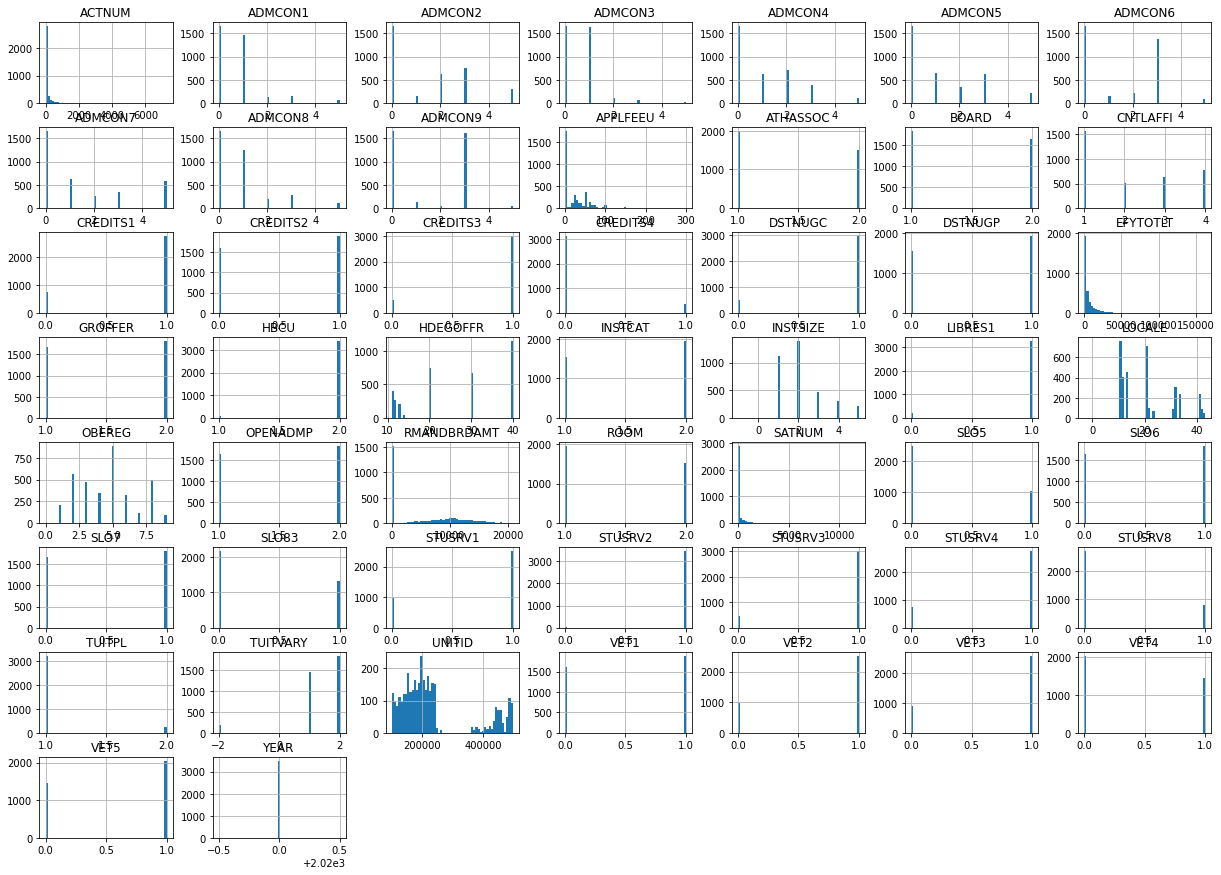

In [11]:
df_2020.hist(bins=55, figsize=(21,15))
plt.show()

In [12]:
df_2020['TUITVARY'].value_counts()

 2    1839
 1    1459
-2     190
Name: TUITVARY, dtype: int64

### Looking at the histograms I realize that one of the variables still needs to be corrected as it contains a "Not Applicable" code: TUITVARY

### We are going to assign  a "NO" to the institutions for which TUITVARY is not applicable since these are institutions that are operating and mainly appear to be college level. 

### Some are  mixed undergraduate and Graduate level institutions but a minority (only 3) 

In [13]:
colc=['TUITVARY']

for i in colc:
  df_2020[i] = df_2020[i].astype(str)
  df_2020[i] = df_2020[i].map(lambda x: re.sub(r'-2', '2', x))
  df_2020[i] = df_2020[i].astype(int)

In [14]:
df_2020['INSTSIZE'].value_counts()

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above
# INSTSIZE	-1	Not reported
# INSTSIZE	-2	Not applicable

 2    1389
 1    1115
 3     463
 4     309
 5     211
-1       1
Name: INSTSIZE, dtype: int64

In [15]:

df_2020 = df_2020.loc[df_2020['INSTSIZE']!=-1]

# Let us recap the variables selected and their codes:

## 'EFYTOTLT' = Our target variable is total enrollment 

## 'YEAR' = Our data refers to the years between 2012 and 2020

## 'UNITID' = ID code for each Heigher Education Institution

## 'STABBR' = State Abbreviation 

## 'INSTNM' = Institution's name

## 'OBEREG'= Code indicating the Bureau of Economic Analysis Regions the US is divided into (MD is in region 2) 
### 0 - US Service schools
### 1 - New England CT ME MA NH RI VT
### 2 - Mid East DE DC MD NJ NY PA
### 3 - Great Lakes IL IN MI OH WI
### 4 - Plains IA KS MN MO NE ND SD
### 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV
### 6 - Southwest AZ NM OK TX
### 7 - Rocky Mountains CO ID MT UT WY
### 8 - Far West AK CA HI NV OR WA
### 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 

## 'HDEGOFFR'= Code indicating the level of Degree offered by the Academic-Oriented HEI
### 11	Doctor's degree - research/scholarship and professional practice
### 12	Doctor's degree - research/scholarship
### 13	Doctor's degree -  professional practice
### 14	Doctor's degree - other
### 20	Master's degree
### 30	Bachelor's degree
### 40	Associate's degree


## 'GROFFER' = Code indicating whether the HEI offers Graduate Level degrees
### 1	Graduate degree or certificate offering
### 2	No graduate offering

## 'HBCU' = Code indicating whether the HEI is an Historical Black College or University 
### 1 - Yes
### 2 - No 

## 'LOCALE' = Code indicating the territorial location of the HEI
### 11	City: Large
### 12	City: Midsize
### 13	City: Small
### 21	Suburb: Large
### 22	Suburb: Midsize
### 23	Suburb: Small
### 31	Town: Fringe
### 32	Town: Distant
### 33	Town: Remote
### 41	Rural: Fringe
### 42	Rural: Distant
### 43	Rural: Remote
### -3	{Not available}

## 'INSTCAT' = Code indicating the type of institution
### 1 - indicates institutions offering undergraduate programs
### 2 - indicates institutions offering both graduate and undergraduate programs

## 'INSTSIZE'= Code indicating the range of students enrollable by year
### 1	Under 1,000
### 2	1,000 - 4,999
### 3	5,000 - 9,999
### 4	10,000 - 19,999
### 5	20,000 and above

## 'CNTLAFFI'= Code indicating the type of control the HEI is subject to 
###	1	Public
###	2	Private for-profit
###	3	Private not-for-profit (no religious affiliation)
###	4	Private not-for-profit (religious affiliation)

## 'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not
### 1 = Yes
### 2 = No

## 'CREDITS1'= Dual enrollment
## 'CREDITS2'= Credit for life experiences
## 'CREDITS3'= Advanced placement (AP) credits
## 'CREDITS4'= Institution does not accept dual, credit for life, or AP credits
### Code  0 = No 
### Code 1 = Yes 

## 'SLO5' = ROTC
## 'SLO6' = Study abroad
## 'SLO7' = Weekend/evening  college
## 'SLO83' = Teacher certification: Approved by the state for initial certifcation or licensure of teachers
### Code  0 = No 
### Code 1 = Yes 

## 'STUSRV1	Remedial services
## STUSRV2	Academic/career counseling service
## STUSRV3	Employment services for students
## STUSRV4	Placement services for completers
## STUSRV8	On-campus day care for students' children
### Code  0 = No 
### Code 1 = Yes 


## 'LIBRES1' = Variable indicating whether the HEI has a library 
### Code  0 = No 
### Code 1 = Yes

## 'ATHASSOC' = Member of National Athletic Association
### 1 - Yes
### 2 - No 

## 'APPLFEEU' = Application Fee

## 'TUITVARY' = Tuition charge varies for in-district, in-state, out-of-state students
### 1 - Yes
### 2 - No 


## 'ROOM' = HEI provides housing
### 1 - Yes
### 2 - No 

## 'BOARD', = HEI provides meal plan 
### 1 - Yes
### 2 - No 

## 'TUITPL' = Any alternative tuition plans offered by institution
### 1 - Yes
### 2 - No 

## VET1	Yellow Ribbon Program (officially known as Post-9/11 GI Bill, Yellow Ribbon Program)
## VET2	Credit for military training
## VET3	Dedicated point of contact for support services for veterans, military servicemembers, and their families
## VET4	Recognized student veteran organization
## VET5	Member of Servicemembers Opportunity Colleges
### Code  0 = No 
### Code 1 = Yes
NOTE: Data for these variables are missing for years 2012 and 2013 

## 'DSTNUGC' = Undergraduate Level distance Education Courses Offered
## DSTNUGP	Undergraduate level distance education programs offered
### Code  0 = No 
### Code 1 = Yes

## 'RMANDBRDAMT' = Room and Board costs

## ADMCON1	Secondary school GPA
## ADMCON2	Secondary school rank
## ADMCON3	Secondary school record
## ADMCON4	Completion of college-preparatory program
## ADMCON5	Recommendations
## ADMCON6	Formal demonstration of competencies
## ADMCON7	Admission test scores
## ADMCON8	TOEFL (Test of English as a Foreign Language
## ADMCON9	Other Test (Wonderlic, WISC-III, etc.)
### 0 Not Applicable
### 1	Required
###	2	Recommended
###	3	Neither required nor recommended
###	4	Do not know
###	5	Considered but not required

## SATNUM	Number of first-time degree/certificate-seeking students submitting SAT scores
## ACTNUM	Number of first-time degree/certificate-seeking students submitting ACT scores


In [16]:
df_2020.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

### We are looking at the data for 2020 only and we are dropping the Institutions Name column as well as the year column 

In [17]:
# df_2020.drop(['YEAR','INSTNM'], axis = 1, inplace=True)

In [18]:

df_2020.drop(['YEAR','UNITID','STABBR', 'INSTNM'], axis = 1, inplace=True)

In [19]:
# df_2020.info()

### Taking a look at the Mean and Standard Deviation of our numerical variables we see that the variables are not normally distributed. The data is affected by outliers 

In [20]:
### Mean and standard deviation across the data 


cols = ['APPLFEEU', 'RMANDBRDAMT', 'SATNUM', 'ACTNUM','EFYTOTLT']

def get_stats(df):
  for i in cols:
    mean_i=round(df[i].mean(),2 )
    stdr_i =round(df[i].std(), 2)  
    print(i, 'mean: ', mean_i)
    print(i, 'standard dev: ', stdr_i)

get_stats(df_2020)   



APPLFEEU mean:  22.94
APPLFEEU standard dev:  28.87
RMANDBRDAMT mean:  5771.91
RMANDBRDAMT standard dev:  5779.17
SATNUM mean:  213.88
SATNUM standard dev:  714.77
ACTNUM mean:  171.49
ACTNUM standard dev:  563.3
EFYTOTLT mean:  6226.78
EFYTOTLT standard dev:  10660.6


### The data pertaining to the Continental US, excluding Service Schools and Outlying Territories, is more balanced - 

In [21]:
df_2020['OBEREG'].value_counts()
# 0 - US Service schools

# 1 - New England CT ME MA NH RI VT
# 2 - Mid East DE DC MD NJ NY PA

# 3 - Great Lakes IL IN MI OH WI
# 4 - Plains IA KS MN MO NE ND SD

# 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV

# 6 - Southwest AZ NM OK TX
# 7 - Rocky Mountains CO ID MT UT WY
# 8 - Far West AK CA HI NV OR WA

# 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 


5    885
2    560
8    491
3    475
4    340
6    323
1    206
7    115
9     88
0      4
Name: OBEREG, dtype: int64

### Let us drop the data regarding the Non-continental USA and Service Schools since these are outlying groups 

In [22]:
df_2020_2 = df_2020.loc[lambda df_2020:((df_2020['OBEREG']!=0)&(df_2020['OBEREG']!=9)),:]

df_2020_ok= df_2020_2.copy(deep=False)
df_2020_ok.shape


(3395, 49)

In [23]:
df_2020_ok[['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']].describe().round(decimals=2)

,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
count,3395.00,3395.00,3395.00,3395.00,3395.00
mean,23.11,5913.70,218.41,175.48,6327.86
std,29.12,5785.70,723.32,570.00,10764.32
min,0.00,0.00,0.00,0.00,6.00
25%,0.00,0.00,0.00,0.00,856.50
50%,0.00,6028.00,0.00,0.00,2450.00
75%,45.00,10800.00,62.50,74.50,7245.50
max,300.00,20894.00,11957.00,7265.00,162646.00


### Taking a look at the numerical variables, it is clear that the data needs to be rescaled and that it also presents outliers 

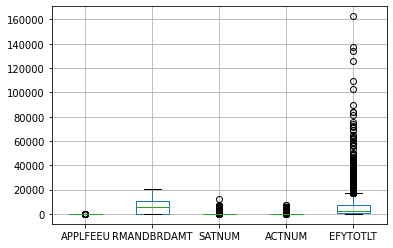

In [24]:
boxplot = df_2020_ok.boxplot(column=['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']) 

### Furthermore, many of the variables are discreet and categorical in nature really. 

### This requires us to make sure that our algorithm interprets the data correctly as categorical in nature, and not numeric

### In order to fix this problem we will preprocess the data

### However, before preprocessing the data, we will split our df in training and testing datasets. This is done at this stage in order not to influence the training dataset with information from our Testing dataset, therefore allowing us to build a more valuable model for prediction purposes

https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b



### Because many of the variables in our DF are categorical in nature we will convert these back into object types in order to have our df set up for one hot encoding. 

In [25]:
df_2020_ok.shape

(3395, 49)

In [26]:
df_2020_ok.columns

Index(['OBEREG', 'HDEGOFFR', 'GROFFER', 'HBCU', 'LOCALE', 'INSTCAT',
       'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3',
       'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2',
       'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU',
       'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4',
       'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2',
       'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8',
       'ADMCON9', 'SATNUM', 'ACTNUM', 'EFYTOTLT'],
      dtype='object')

In [28]:
df_2020_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 31071 to 34558
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OBEREG       3395 non-null   int64
 1   HDEGOFFR     3395 non-null   int64
 2   GROFFER      3395 non-null   int64
 3   HBCU         3395 non-null   int64
 4   LOCALE       3395 non-null   int64
 5   INSTCAT      3395 non-null   int64
 6   INSTSIZE     3395 non-null   int64
 7   CNTLAFFI     3395 non-null   int64
 8   OPENADMP     3395 non-null   int64
 9   CREDITS1     3395 non-null   int64
 10  CREDITS2     3395 non-null   int64
 11  CREDITS3     3395 non-null   int64
 12  CREDITS4     3395 non-null   int64
 13  SLO5         3395 non-null   int64
 14  SLO6         3395 non-null   int64
 15  SLO7         3395 non-null   int64
 16  SLO83        3395 non-null   int64
 17  STUSRV1      3395 non-null   int64
 18  STUSRV2      3395 non-null   int64
 19  STUSRV3      3395 non-null   int64
 20  STU

### We will split our data before pre-processing it as this avoids encountering some issues down the road. There is debate among experts on whether this is the proper approach to hold. 

### Checking different preprocessing procedures it seems clear that using Robust scaling for the Numerical columns in our df is the best approach.

### This approach to pre-processing the data takes into consideration the presence of outliers, which our data has many of

In [29]:
df_2020_num = df_2020_ok.loc[:,['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']]
# df_2020_num

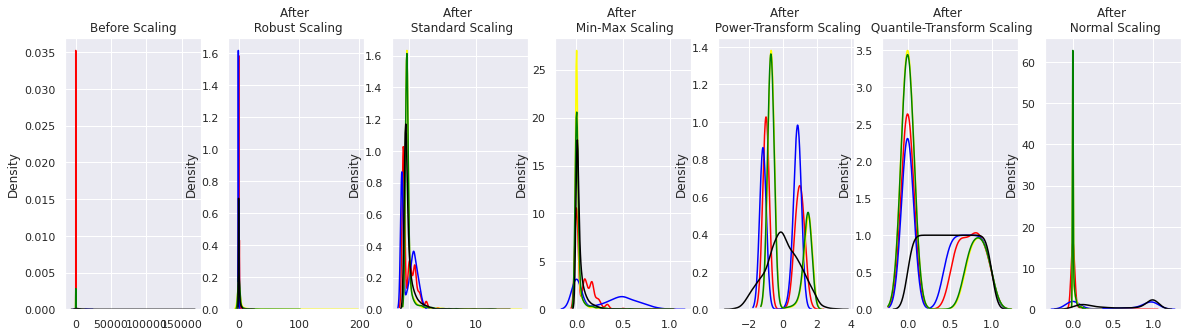

In [30]:
# data https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

scaler = RobustScaler()
robust_df = scaler.fit_transform(df_2020_num)
robust_df = pd.DataFrame(robust_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])
 
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_2020_num)
standard_df = pd.DataFrame(standard_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])
 
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df_2020_num)
minmax_df = pd.DataFrame(minmax_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])
 
scaler = PowerTransformer()
powerTransform_df = scaler.fit_transform(df_2020_num)
powerTransform_df = pd.DataFrame(powerTransform_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])

scaler = QuantileTransformer()
quantileTransform_df = scaler.fit_transform(df_2020_num)
quantileTransform_df = pd.DataFrame(quantileTransform_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])

scaler = Normalizer()
normalized_df = scaler.fit_transform(df_2020_num)
normalized_df = pd.DataFrame(normalized_df, columns =['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT'])

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols = 7, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(df_2020_num['APPLFEEU'], ax = ax1, color ='red')
sns.kdeplot(df_2020_num['RMANDBRDAMT'], ax = ax1, color ='blue')
sns.kdeplot(df_2020_num['SATNUM'], ax = ax1, color ='yellow')
sns.kdeplot(df_2020_num['ACTNUM'], ax = ax1, color ='green')
sns.kdeplot(df_2020_num['EFYTOTLT'], ax = ax1, color ='black') # '', '',''
ax2.set_title('After \n Robust Scaling')
 
sns.kdeplot(robust_df['APPLFEEU'], ax = ax2, color ='red')
sns.kdeplot(robust_df['RMANDBRDAMT'], ax = ax2, color ='blue')
sns.kdeplot(robust_df['SATNUM'], ax = ax2, color ='yellow')
sns.kdeplot(robust_df['ACTNUM'], ax = ax2, color ='green')
sns.kdeplot(robust_df['EFYTOTLT'], ax = ax2, color ='black')

ax3.set_title('After \n Standard Scaling')
 
sns.kdeplot(standard_df['APPLFEEU'], ax = ax3, color ='red')
sns.kdeplot(standard_df['RMANDBRDAMT'], ax = ax3, color ='blue')
sns.kdeplot(standard_df['SATNUM'], ax = ax3, color ='yellow')
sns.kdeplot(standard_df['ACTNUM'], ax = ax3, color ='green')
sns.kdeplot(standard_df['EFYTOTLT'], ax = ax3, color ='black')

ax4.set_title('After \n Min-Max Scaling')
sns.kdeplot(minmax_df['APPLFEEU'], ax = ax4, color ='red')
sns.kdeplot(minmax_df['RMANDBRDAMT'], ax = ax4, color ='blue')
sns.kdeplot(minmax_df['SATNUM'], ax = ax4, color ='yellow')
sns.kdeplot(minmax_df['ACTNUM'], ax = ax4, color ='green')
sns.kdeplot(minmax_df['EFYTOTLT'], ax = ax4, color ='black')

ax5.set_title('After \n Power-Transform Scaling')
sns.kdeplot(powerTransform_df['APPLFEEU'], ax = ax5, color ='red')
sns.kdeplot(powerTransform_df['RMANDBRDAMT'], ax = ax5, color ='blue')
sns.kdeplot(powerTransform_df['SATNUM'], ax = ax5, color ='yellow')
sns.kdeplot(powerTransform_df['ACTNUM'], ax = ax5, color ='green')
sns.kdeplot(powerTransform_df['EFYTOTLT'], ax = ax5, color ='black')

ax6.set_title('After \n Quantile-Transform Scaling')
sns.kdeplot(quantileTransform_df['APPLFEEU'], ax = ax6, color ='red')
sns.kdeplot(quantileTransform_df['RMANDBRDAMT'], ax = ax6, color ='blue')
sns.kdeplot(quantileTransform_df['SATNUM'], ax = ax6, color ='yellow')
sns.kdeplot(quantileTransform_df['ACTNUM'], ax = ax6, color ='green')
sns.kdeplot(quantileTransform_df['EFYTOTLT'], ax = ax6, color ='black')

ax7.set_title('After \n Normal Scaling')
sns.kdeplot(normalized_df['APPLFEEU'], ax = ax7, color ='red')
sns.kdeplot(normalized_df['RMANDBRDAMT'], ax = ax7, color ='blue')
sns.kdeplot(normalized_df['SATNUM'], ax = ax7, color ='yellow')
sns.kdeplot(normalized_df['ACTNUM'], ax = ax7, color ='green')
sns.kdeplot(normalized_df['EFYTOTLT'], ax = ax7, color ='black')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    # ax.yaxis.grid(True)
    ax.set_xlabel('')
    # ax.set_ylabel('Observed values')

In [31]:
X = df_2020_ok.iloc[:, :-1]
y = df_2020_ok.iloc[:, -1:]



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
X_train

,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,INSTSIZE,CNTLAFFI,OPENADMP,CREDITS1,...,ADMCON2,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM
34249,5,30,2,2,12,2,1,4,1,1,...,0,0,0,0,0,0,0,0,0,0
32066,2,40,2,2,11,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31536,5,12,1,2,13,2,3,3,2,1,...,5,1,1,5,2,5,1,3,996,598
32815,5,40,2,2,42,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
32147,1,20,1,2,13,2,2,3,2,1,...,3,1,2,1,3,5,1,3,177,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32168,1,11,1,2,11,2,5,3,2,1,...,2,1,2,1,2,1,1,3,1683,976
32203,3,11,1,2,32,2,4,1,2,1,...,1,1,1,2,3,5,1,3,1957,395
32367,4,20,1,2,12,2,1,3,2,1,...,3,1,3,3,3,2,2,2,0,0
31932,4,11,1,2,13,2,5,1,2,1,...,2,2,2,2,3,5,1,3,800,3421


In [34]:
 #  #  #  SCALING AFTER SPLITTING LEADS TO ERROR (WITH variables)

# https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b
# Sebastian Raschka & Vahid Mirjalili (2019) Python Machine Learning 


# scaler = ColumnTransformer([('onehot1',OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False), [0]),
#                             ('onehot2',OneHotEncoder(categories='auto', drop='first', handle_unknown="ignore", sparse=False), 
#                              [1]),
#                             ('robust_scaling', RobustScaler(), [26,38,48, 49])
#                              ] )

# scaler = ('robust_scaling', RobustScaler(), [24,36,46, 47]) 
scaler = ColumnTransformer(remainder='passthrough', 
                           transformers=[('robust_scaling', RobustScaler(), [24,36,46, 47])
                           ])
# 
# I have eliminated the State information and HIEs Unit Id information from the DF 

scaler_y = RobustScaler()


X_train_scaled = scaler.fit_transform(X_train).astype(float)
X_test_scaled = scaler.transform(X_test)

y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()
y_train_scaled = scaler_y.fit_transform(y_train1[:,0].reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test1[:,0].reshape(-1,1))


# y_train_scaled = scaler_y.fit_transform(y_train1[:,np.newaxis]).flatten()
# y_test_scaled = scaler_y.fit_transform(y_test1[:,np.newaxis]).flatten()

# https://priyanka-ddit.medium.com/handle-unknown-categories-using-onehotencoder-181bdc0a163c - handle error to error 
# https://github.com/marcotcr/lime/issues/418 
# https://www.roelpeters.be/found-unknown-categories-in-column-sklearn/ Error to ignore does not solve the problem 

### Now that we have pre-processed our data let us split our DF in training and testing  datasets

In [35]:
X_train_scaled.shape

(2376, 48)

In [36]:
X_test_scaled.shape

(1019, 48)

In [37]:
y_test_scaled.shape

(1019, 1)

In [38]:
y_train_scaled.shape

(2376, 1)

### Creating the Covariance matrix for the scaled data as a first step to then select the most importat features that seem to influence enrollment in the HEIs

In [39]:
X_train_scaled1 = pd.DataFrame(X_train_scaled)
# X_train_scaled1

In [40]:
X_test_scaled1 = pd.DataFrame(X_test_scaled)
# X_test_scaled1

In [41]:
y_train_scaled1 = pd.DataFrame(y_train_scaled)
# y_train_scaled1

In [42]:
y_test_scaled1 = pd.DataFrame(y_test_scaled)
# y_test_scaled1

In [43]:
# type(y_train_scaled1)

### Let us first run a straightforward linear regression on the data and see how the model performs 

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# import numpy as np


regressor = LinearRegression()
reg=regressor.fit(X_train_scaled, y_train_scaled)
reg.score(X_train_scaled, y_train_scaled)

# reg.coef_

# reg.intercept_

# reg.predict(np.array([[3, 5]]))



0.6740861794455203

In [45]:
reg.coef_

array([[-0.03374114, -0.39659443,  0.01934791,  0.01096469,  0.02492694,
         0.01083404,  0.14069179,  0.03474407, -0.00678765,  0.06259311,
         1.14705706,  0.07486042, -0.12580951,  0.20121865,  0.04321486,
         0.07856374,  0.18457272, -0.06610737,  0.01887346,  0.04440684,
         0.0076978 ,  0.0117341 ,  0.04149551, -0.01070539, -0.03206023,
         0.0296441 , -0.12278773,  0.14186676,  0.01185177, -0.09172892,
         0.01451114,  0.04265442, -0.04869336,  0.02454271, -0.09893676,
        -0.11801212, -0.05039534, -0.08331008, -0.00451132,  0.01416049,
         0.01275918,  0.00175988,  0.04636434,  0.0024841 ,  0.00323637,
         0.00129462, -0.00586889, -0.06513796]])

In [46]:
reg.intercept_

array([-2.68611984])

In [47]:
y_test_scaled_predicted = reg.predict(X_test_scaled)

y_train_scaled_predicted = reg.predict(X_train_scaled)


### The performance of the straightforward regression on our test data is not very good.

### This is not surprising as we have not performed any data manipulation or feature selection to better calibrate our model 

### Note that the performance is not good on neither Testing nor Training data. Our model in fact reaches only a 66.75% accuracy on Training data  and only a 60.52 % accuracy on Testing data. 

In [48]:
# Model Performance on training data AND on testing data
scores = reg.score(X_train_scaled,y_train_scaled)
print("Training Data Model Accuracy: %.2f%%\n" % (scores*100))
scores = reg.score(X_test_scaled,y_test_scaled)
print("Testing Data Model Accuracy: %.2f%%\n" % (scores*100))

Training Data Model Accuracy: 67.41%

Testing Data Model Accuracy: 59.68%



### Although the accuracy is relatively low the measure of the Mean Squared Error is not very high all things considered. This would seem to indicate that the model performs well and that the error (the residuals) between actual enrollment and predicted enrollment for our HEIs for the year 2020 are relatively small. 

### Looking at the explained variance from the model we note that this is actually not  too high which also confirms that the model is not performing so well . 

### Higher explained variance implies a stronger association between the variables and the target variable which would indicate that the model leads to better predictions. 


In [49]:
# Explained variance score: 1 is perfect prediction
print('The Explained Variance score \n(also known as the Coefficient of Determination or R Squadre) is: %.2f' % r2_score(y_test_scaled, y_test_scaled_predicted))

The Explained Variance score 
(also known as the Coefficient of Determination or R Squadre) is: 0.60


In [50]:


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R-Squared (test data): ", round((r2_score(y_test_scaled, y_test_scaled_predicted)*100), 2), '%\n')
print("R-Squared represents the fraction of response  variance captured by the model (a 'standardized' Mean Squared Error) \n\n")

print("Mean absolute error (MAE) (test data): ", (mean_absolute_error(y_test_scaled, y_test_scaled_predicted)),'\n')

print("Mean squared error (MSE) (test data): ", np.sqrt(mean_squared_error(y_test_scaled, y_test_scaled_predicted)),'\n')
print("The larger value of the MSE on the test dataset indicates that the model is not performing great and that it is Overfitting\n\n")

print("R-Squared (train data): ", round((r2_score(y_train_scaled, y_train_scaled_predicted)*100), 2), '%\n')

print("Mean absolute error (MAE) (train data): ", (mean_absolute_error(y_train_scaled, y_train_scaled_predicted)),'\n')

print("Mean squared error (MSE) (train data): ", np.sqrt(mean_squared_error(y_train_scaled, y_train_scaled_predicted)),'\n')

R-Squared (test data):  59.68 %

R-Squared represents the fraction of response  variance captured by the model (a 'standardized' Mean Squared Error) 


Mean absolute error (MAE) (test data):  0.49868030157850524 

Mean squared error (MSE) (test data):  1.1589300948883814 

The larger value of the MSE on the test dataset indicates that the model is not performing great and that it is Overfitting


R-Squared (train data):  67.41 %

Mean absolute error (MAE) (train data):  0.45438593851229053 

Mean squared error (MSE) (train data):  0.9070804764171982 



### Taking a look at the relationship between predicted and actual target values for our training dataset, we can readily see that the mnodel is not performing very well and that there is room for improvement. 

### This was confirmed by our Accuracy scores, and by our Coefficient of Determination (R Squared) but we can take a look at the residuals' Scatter plot to reach the same conclusion. 

### It appears that the presence of outliers is affecting our model in spite of the pre-processing we applied on our data. 

### The scatter plot of actual target values vs predicted shows a clear trend, instead of being randomly distributed, confirming our conclusions.

### Furthermore, looking at the scatter plot comparing Actual Target values with  the Predicted ones, we can see that Predicted values are predicted to be lower than they should be (they mostly lie below the 45 degree line). 

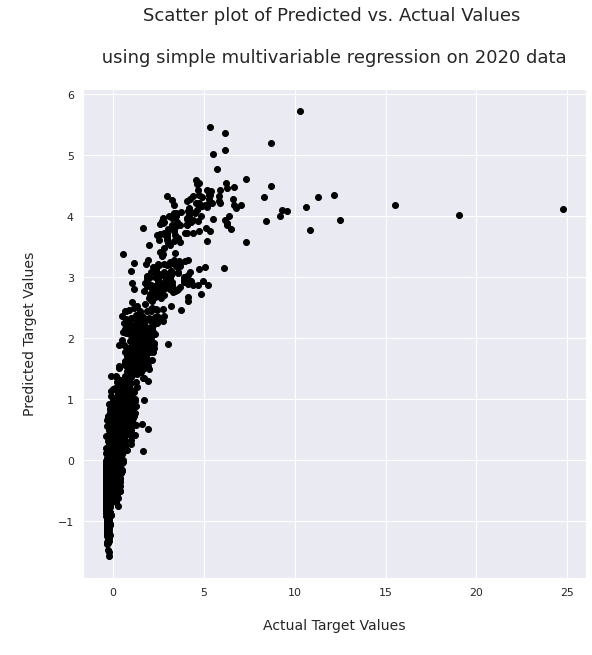

In [51]:
sns.set(rc = {'figure.figsize':(9,9)})

fig, ax = plt.subplots()
ax.scatter(y_train_scaled, y_train_scaled_predicted,  color='black')
ax.set_title("Scatter plot of Predicted vs. Actual Values \n \n using simple multivariable regression on 2020 data \n", fontsize=18)
ax.set_xlabel("\nActual Target Values\n", fontsize=14)
ax.set_ylabel("\nPredicted Target Values\n", fontsize=14)

plt.show()


### Let us measure the errors associated with the training data set and the testing data set to see if there  is overfitting  

In [52]:
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, X_train_scaled, y_train_scaled,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [53]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

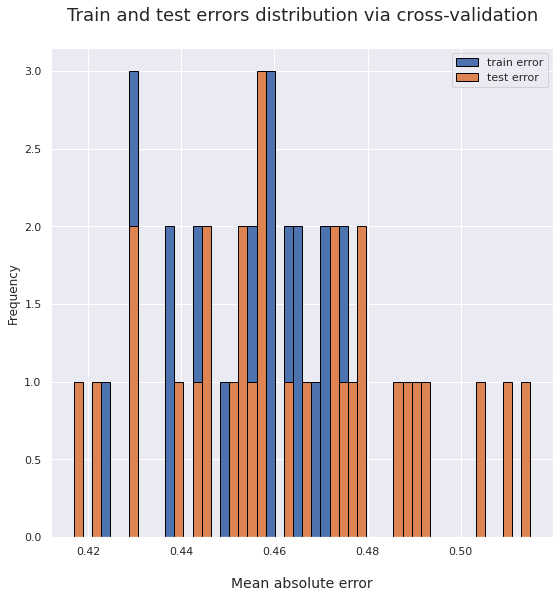

In [54]:

scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("\nMean absolute error\n", fontsize=14)
_ = plt.title("Train and test errors distribution via cross-validation\n", fontsize=18)

In [55]:
LinearRegression.get_params(regressor).keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [56]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [57]:
%%time
from sklearn.model_selection import validation_curve

param_range = [-3.5, -3, -2.5, -2, -1.5, -1, -.5, 0.001, 0.01, 0.05, 0.1, 0.5]
train_scores, test_scores = validation_curve(
    regressor, X_train_scaled, y_train_scaled, param_name='fit_intercept', param_range=param_range,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

CPU times: user 1.05 s, sys: 68.6 ms, total: 1.12 s
Wall time: 2.45 s


### The training error is significantly lower than the Testing error which would again seem to confirm that the model is overfitting the data (see figure below) 

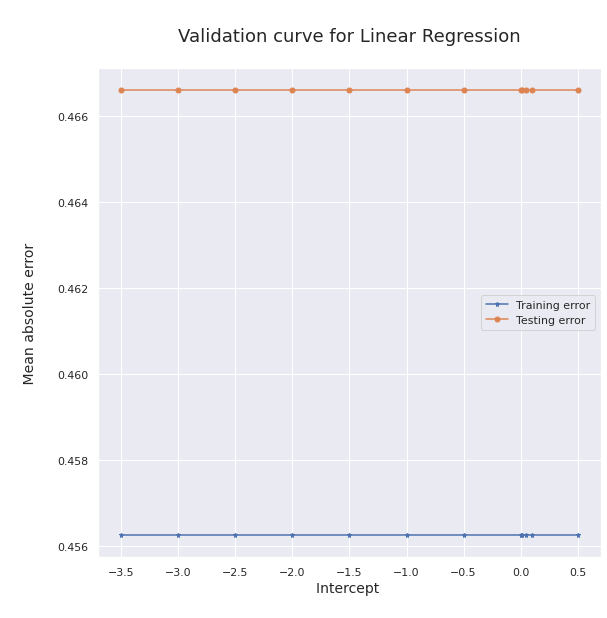

In [58]:
# https://vitalflux.com/validation-curves-explained-python-sklearn-example/
# https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_validation_curve.html
# https://stackoverflow.com/questions/44882331/sklearn-validation-curve-which-possibilities-do-i-have-for-the-param-name-pa
# 
plt.plot(param_range, train_errors.mean(axis=1), marker='*', markersize=5, label="Training error")
plt.plot(param_range, test_errors.mean(axis=1), marker='o', markersize=5, label="Testing error")
plt.legend()

plt.xlabel("Intercept \n", fontsize = 14)
plt.ylabel("\n Mean absolute error \n", fontsize = 14)
_ = plt.title("\nValidation curve for Linear Regression\n", fontsize=18)

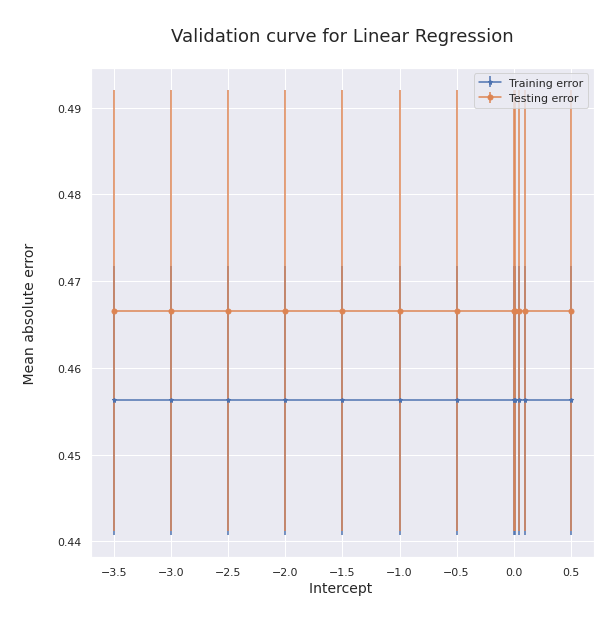

In [59]:
plt.errorbar(param_range, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), marker='*', markersize=5, label='Training error')
plt.errorbar(param_range, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), marker='o', markersize=5, label='Testing error')
plt.legend()

plt.xlabel("Intercept \n", fontsize = 14)
plt.ylabel("\n Mean absolute error \n", fontsize = 14)
_ = plt.title("\nValidation curve for Linear Regression\n", fontsize=18)

### Let us see if we can do better by using a penalized Linear Regression model 

### We will use a Ridge or L2 penalized model in this case because it is a model that tends to avoid overfitting of the data

### L1 Regularization can be performed for feature selection and then L2 can be performed on the selected features to avoid overfitting 

In [60]:
from sklearn.model_selection import validation_curve

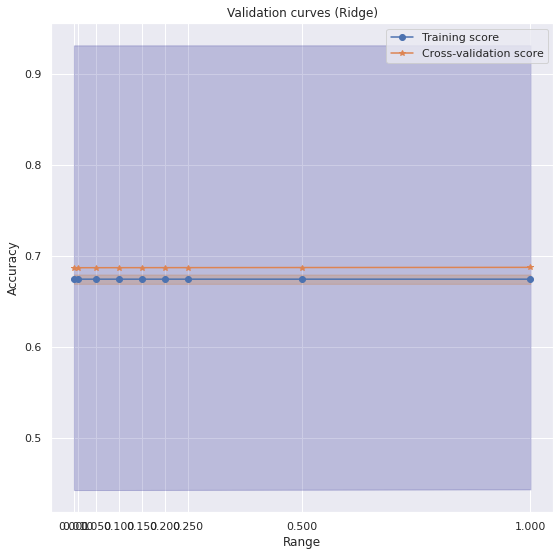

In [61]:
# https://machinelearningmastery.com/ridge-regression-with-python/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
# https://scikit-learn.org/stable/modules/learning_curve.html
# https://vitalflux.com/validation-curves-explained-python-sklearn-example/

#  evaluate an ridge regression model on the dataset

# # define model
model = Ridge(alpha=1.0)
# # define model evaluation method
cv = RepeatedKFold(n_splits=100, n_repeats=7, random_state=1)
# # evaluate model
scores = cross_val_score(model, X_train_scaled, y_train_scaled, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


param_range = [0.0010, 0.01, 0.05, 0.100, 0.150, 0.200, 0.25, 0.5, 1]
train_scores, test_scores = validation_curve(model, X_train_scaled, y_train_scaled, param_name="alpha", param_range=param_range, cv=cv)
                                             #param_range=np.logspace(-6, -1, 9), cv=cv)

# Calculate the average and standard deviation for each hyperparameter
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# # Plot the scores
plt.figure()
plt.title('Validation curves (Ridge)')
# Plot the standard deviations
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="darkorange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, color="navy")

# Plot the means
plt.plot(param_range, train_scores_mean, 'o-', label="Training score")
plt.plot(param_range, test_scores_mean, '*-', label="Cross-validation score")

plt.xticks(param_range)
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.legend(loc="best")

In [62]:


# define model
model = Ridge(alpha=1.0)
# fit model
model.fit(X_train_scaled, y_train_scaled)
#
# make a prediction
y_train_scaled_predicted_ridge = model.predict(X_train_scaled)
# summarize prediction
print('Predicted with Ridge: ', y_train_scaled_predicted_ridge )

Predicted with Ridge:  [[-0.04306385]
 [ 0.60110593]
 [ 1.25237134]
 ...
 [-0.28369461]
 [ 3.7223401 ]
 [ 0.54274374]]


### Now let us see if we can do better by simply applying a feature selection process to our data prior to using the subset of data to predict our outcome variable

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

### Let us take a moment and apply the Recursive Feature Selection function to see what features it comes up with 


from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=0.3)
selector = selector.fit(X_train_scaled, y_train_scaled)
cols = selector.get_support(indices=True)
feature_names =  X_train_scaled1.iloc[:,cols] # THIS IS A DF - MUST CORRECT TO GET FEATURE NAMES OUT 
print(feature_names)
# # Get columns to keep and create new dataframe with those only
# cols = selector.get_support(indices=True)
# features_df_new = features_df.iloc[:,cols]

        1    6    7    10   16   20   25   27   31   32
0    -0.55 2.00 2.00 1.00 0.00 0.00 0.00 2.00 1.00 1.00
1    -0.55 2.00 2.00 2.00 0.00 1.00 1.00 1.00 1.00 0.00
2     0.61 1.00 2.00 3.00 0.00 0.00 0.00 1.00 1.00 1.00
3    -0.55 2.00 2.00 2.00 0.00 0.00 0.00 2.00 1.00 0.00
4     0.95 1.00 2.00 2.00 0.00 1.00 0.00 1.00 1.00 1.00
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2371  1.08 1.00 2.00 5.00 0.00 1.00 1.00 1.00 1.00 1.00
2372  0.45 1.00 2.00 4.00 0.00 1.00 0.00 1.00 1.00 1.00
2373 -0.55 1.00 2.00 1.00 0.00 0.00 0.00 2.00 1.00 0.00
2374  0.38 1.00 2.00 5.00 0.00 1.00 1.00 1.00 1.00 1.00
2375 -0.55 1.00 2.00 2.00 1.00 0.00 0.00 2.00 1.00 1.00

[2376 rows x 10 columns]


In [64]:
selector.ranking_

array([4, 1, 3, 3, 3, 4, 1, 1, 4, 4, 1, 4, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3,
       4, 3, 4, 1, 4, 1, 3, 3, 4, 1, 1, 3, 3, 4, 3, 2, 2, 3, 4, 4, 2, 3,
       4, 3, 4, 2])

In [65]:
# from sklearn.pipeline import Pipeline

In [66]:
support = selector.support_

print(support)
print(len(support))

index_bool = np.array(support)
colus=X_train.columns

print(colus[index_bool])


# selector.get_feature_names_out()
# feature_names = np.array(X_train_scaled.feature_names) # transformed list to array

# feature_names[support]

# print(selector.get_feature_names_out())
# support = ipeline.named_steps['rfe_feature_selection'].support_
# print(selector.get_feature_names_out(feature_names))
# selector.feature_names_in_



[False  True False False False False  True  True False False  True False
 False False False False  True False False False  True False False False
 False  True False  True False False False  True  True False False False
 False False False False False False False False False False False False]
48
Index(['HDEGOFFR', 'INSTSIZE', 'CNTLAFFI', 'CREDITS2', 'SLO83', 'STUSRV4',
       'TUITVARY', 'BOARD', 'VET3', 'VET4'],
      dtype='object')


### The first ten features affecting enrollemnt - for 2020 data - appear to be:
'HDEGOFFR', 'INSTSIZE', 'CNTLAFFI', 'CREDITS2', 'SLO83', 'STUSRV4',
       'TUITVARY', 'BOARD', 'VET3', 'VET4' 


### I must admit that I am surprised by the fact that there has been no improvement by using the L2 penalty on our data with the linear regressor. 

### Given this result I will use the LazyPredict Library to take a look at the performance of various Linear Regression Model options that are open to us in general to see which would perform the best with our 2020 standardized data

### Let us try to run our data through the LazyPredict Library then. 

### The LazyPredict Library tests various models against our data and returns various indicators on the models' performance with our data

In [67]:

# Importing the libraries
from lazypredict.Supervised import LazyRegressor
# from sklearn import datasets
# from sklearn.utils import shuffle
# import numpy as np
 

 
# building the pipeline
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_reg, predictions_reg = reg.fit(X_train_scaled, X_train_scaled, y_train_scaled, y_train_scaled)
 


 21%|██▏       | 9/42 [00:02<00:13,  2.39it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 76%|███████▌  | 32/42 [00:23<00:10,  1.08s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████| 42/42 [00:33<00:00,  1.24it/s]


In [68]:
# Printing all model performances
models_reg

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.03,0.07
ExtraTreeRegressor,1.00,1.00,0.03,0.08
ExtraTreesRegressor,1.00,1.00,0.03,1.90
GaussianProcessRegressor,1.00,1.00,0.03,1.46
XGBRegressor,1.00,1.00,0.11,2.60
RandomForestRegressor,0.96,0.96,0.30,4.32
BaggingRegressor,0.96,0.96,0.32,0.23
MLPRegressor,0.93,0.93,0.43,11.22
HistGradientBoostingRegressor,0.92,0.92,0.45,0.87


[(0.0, 1.0)]

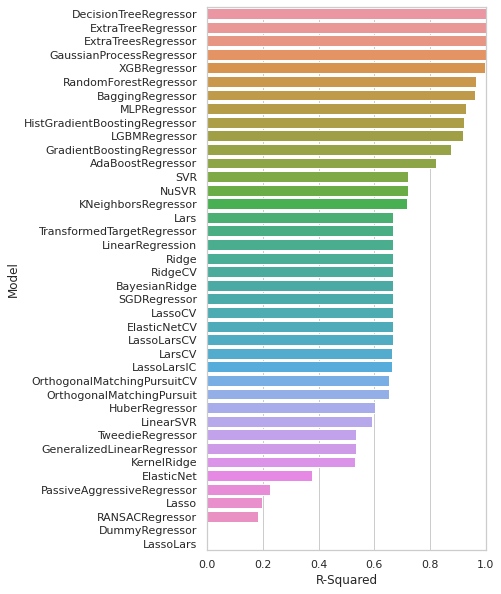

In [69]:
 
models_reg["R-Squared"] = [0 if i < 0 else i for i in models_reg.iloc[:,0] ]
 
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_reg.index, x="R-Squared", data=models_reg)
ax.set(xlim=(0, 1))

### Based on the LazyPredict Library results it appears that we should see significant improvements by utilizing a Random Tree selection model with our data. 

In [70]:
pip install xgboost

In [71]:
# from sklearn.ensemble import GradientBoostingRegressor
# # from sklearn.ensemble import LGBMRegressor
# # from sklearn.ensemble import XGBRFRegressor
# import xgboost
from xgboost import XGBRFRegressor

In [85]:
# gradient xgboost random forest for making predictions for regression
# from numpy import asarray
# from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model_xgboost = XGBRFRegressor(learning_rate= 1, max_depth= 5, n_estimators=100, subsample=0.7, colsample_bynode=0.8)

# model_no_constraints = xgb.train(params, dtrain,
#                                  num_boost_round = 1000, evals = evallist,
#                                  early_stopping_rounds = 10)

# params = {
#   'colsample_bynode': 0.8,
#   'learning_rate': 1,
#   'max_depth': 5,
#   'num_parallel_tree': 100,
#   'objective': 'binary:logistic',
#   'subsample': 0.8,
#   'tree_method': 'gpu_hist'
# }
# bst = train(params, dmatrix, num_boost_round=1)




# fit the model on the whole dataset
model_xgboost.fit(X_train_scaled, y_train_scaled)
# define a single row of data
# row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
# row = asarray([row])
# make a prediction
y_train_scaled_predicted_xgboost = model_xgboost.predict(X_train_scaled)
y_test_scaled_predicted_xgboost = model_xgboost.predict(X_test_scaled)
# summarize the prediction
print('Predicted Coefficients: ', y_test_scaled_predicted_xgboost)

Predicted Coefficients:  [-0.00412434 -0.32809693  1.3278601  ... -0.32293344 -0.05432796
  0.28297672]


In [73]:
model_xgboost.score(X_train_scaled, y_train_scaled)

0.8965714235842672

In [74]:
# Model Performance on training data AND on testing data
scores = model_xgboost.score(X_train_scaled,y_train_scaled)
print("Training Data XGBoost Model Accuracy: %.2f%%\n" % (scores*100))
scores = model_xgboost.score(X_test_scaled,y_test_scaled)
print("Testing Data XGBoost Model Accuracy: %.2f%%\n" % (scores*100))

Training Data XGBoost Model Accuracy: 89.66%

Testing Data XGBoost Model Accuracy: 67.55%



In [83]:
y_test_scaled.shape

(1019, 1)

In [80]:
# y_test_scaled_predicted_xgboost
print(y_test_scaled_predicted_xgboost.shape)

(1019,)


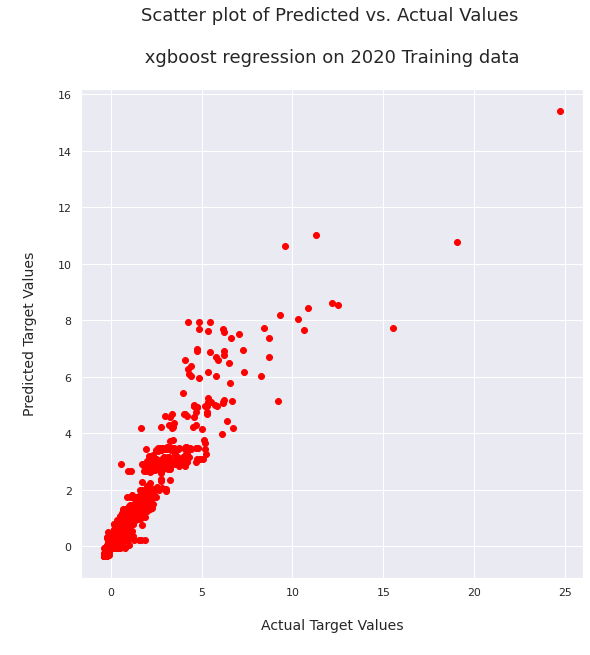

In [87]:
sns.set(rc = {'figure.figsize':(9,9)})

fig, ax = plt.subplots()
ax.scatter(y_train_scaled, y_train_scaled_predicted_xgboost,  color='red')
ax.set_title("Scatter plot of Predicted vs. Actual Values \n \n xgboost regression on 2020 Training data \n", fontsize=18)
ax.set_xlabel("\nActual Target Values\n", fontsize=14)
ax.set_ylabel("\nPredicted Target Values\n", fontsize=14)

plt.show()

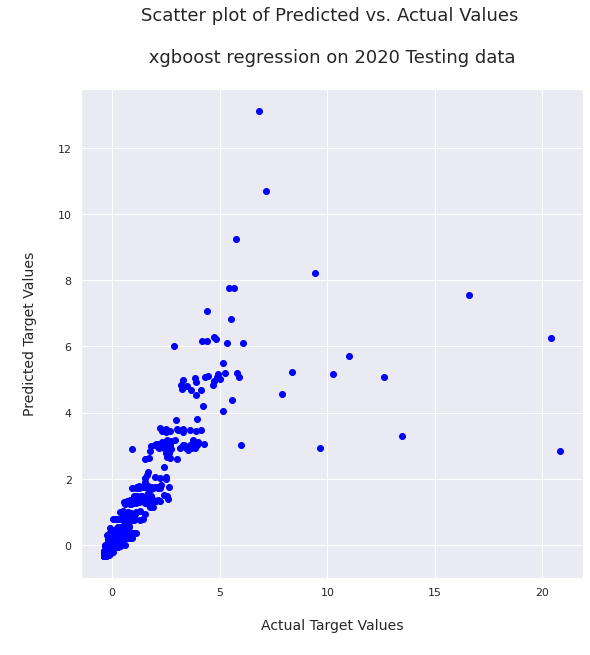

In [89]:
sns.set(rc = {'figure.figsize':(9,9)})

fig, ax = plt.subplots()
ax.scatter(y_test_scaled, y_test_scaled_predicted_xgboost,  color='blue')
ax.set_title("Scatter plot of Predicted vs. Actual Values \n \n xgboost regression on 2020 Testing data \n", fontsize=18)
ax.set_xlabel("\nActual Target Values\n", fontsize=14)
ax.set_ylabel("\nPredicted Target Values\n", fontsize=14)

plt.show()

### We can see an improvement in the performance of the model with an increaqse in Rsquared and a decrease in the Mean Ablosute Error values, however, the MSE remains fairly constant even with this model. 

In [90]:


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R-Squared (test data with XGBoosted Model): ", round((r2_score(y_test_scaled, y_test_scaled_predicted_xgboost)*100), 2), '%\n')
print("R-Squared represents the fraction of response  variance captured by the model (a 'standardized' Mean Squared Error) \n\n")

print("Mean absolute error (MAE) (test data with XGBoosted Model): ", (mean_absolute_error(y_test_scaled, y_test_scaled_predicted_xgboost)),'\n')

print("Mean squared error (MSE) (test data with XGBoosted Model ): ", np.sqrt(mean_squared_error(y_test_scaled, y_test_scaled_predicted_xgboost)),'\n')
print("The larger value of the MSE on the test dataset indicates that the model is not performing great and that it is Overfitting\n\n")



R-Squared (test data with XGBoosted Model):  67.55 %

R-Squared represents the fraction of response  variance captured by the model (a 'standardized' Mean Squared Error) 


Mean absolute error (MAE) (test data with XGBoosted Model):  0.310653571816722 

Mean squared error (MSE) (test data with XGBoosted Model ):  1.039645732557313 

The larger value of the MSE on the test dataset indicates that the model is not performing great and that it is Overfitting




### CLustering  on 2020 data 

In [91]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import multilabel_confusion_matrix

In [92]:
df_2020_2 = df.loc[lambda df:((df['YEAR']==2020)),:]
df_2020cl=df_2020_2.copy(deep=False)

In [93]:
df_2020cl.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

In [94]:
df_2020cl['OBEREG'].value_counts()

5    886
2    560
8    491
3    475
4    340
6    323
1    206
7    115
9     88
0      4
Name: OBEREG, dtype: int64

In [95]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['TUITVARY']!=-2)),:]

In [96]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['INSTSIZE']!=-1)),:]

In [97]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['OBEREG']!=0)),:]

In [98]:
df_2020cl = df_2020cl.loc[lambda df_2020cl:((df_2020cl['OBEREG']!=9)),:]

### For our clustering analysis let us reduce the number of columns eliminating columns that could be correlated: 

In [99]:
df_2020cl.drop(['YEAR', 'UNITID','INSTNM','GROFFER','DSTNUGP'], axis=1, inplace=True)

In [100]:
df_2020cl.columns

Index(['STABBR', 'OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
       'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
       'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM',
       'ACTNUM', 'EFYTOTLT'],
      dtype='object')

### Just running  LazyPredict on the un-pre-processed data leads to fairly bad accuracy results as we can see

In [101]:
from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

X = df_2020cl.iloc[:, 1:]
y = df_2020cl.iloc[:, :1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
clf_models, clf_predictions = clf.fit(X_train, X_test, y_train, y_test)

print(clf_models)

100%|██████████| 29/29 [01:01<00:00,  2.11s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.52               0.40    None      0.51   
XGBClassifier                      0.50               0.39    None      0.49   
BaggingClassifier                  0.48               0.37    None      0.46   
RandomForestClassifier             0.47               0.31    None      0.44   
DecisionTreeClassifier             0.40               0.31    None      0.41   
ExtraTreesClassifier               0.44               0.30    None      0.42   
LinearSVC                          0.33               0.25    None      0.30   
GaussianNB                         0.15               0.23    None      0.11   
SGDClassifier                      0.24               0.17    None      0.24   
QuadraticDiscriminantAnalysis      0.38               0.16    None      0.30   
LinearDiscriminantAnalysis         0.13 

[(0.0, 1.0)]

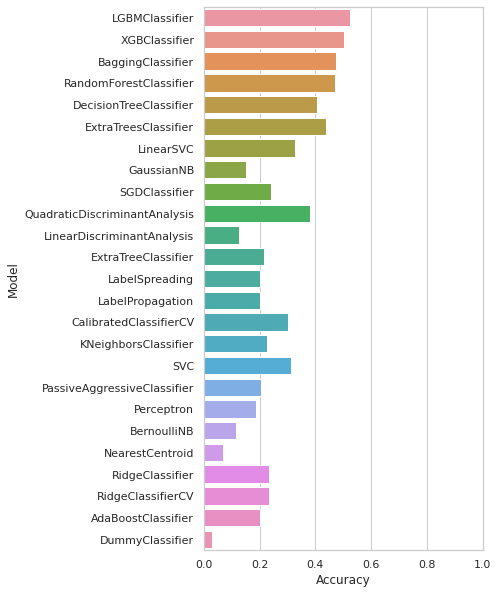

In [102]:
 # Printing all model performances
clf_models
clf_models["Accuracy"] = [0 if i < 0 else i for i in clf_models.iloc[:,0] ]
 
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=clf_models.index, x="Accuracy", data=clf_models)
ax.set(xlim=(0, 1))

### LaziPredict will pre-process the data autonomously. 
### Let us make sure that it knows which variables are categorical and which are not and re-run it to see if we get different outcomes 

In [103]:

df_2020cl['OBEREG'] = df_2020cl['OBEREG'].astype(str)
df_2020cl['HDEGOFFR'] = df_2020cl['HDEGOFFR'].astype(str)
# df_2020cl['GROFFER'] = df_2020cl['GROFFER'].astype(str)
df_2020cl['HBCU'] = df_2020cl['HBCU'].astype(str)
df_2020cl['LOCALE'] = df_2020cl['LOCALE'].astype(str)
df_2020cl['INSTCAT'] = df_2020cl['INSTCAT'].astype(str)
df_2020cl['INSTSIZE'] = df_2020cl['INSTSIZE'].astype(str)
df_2020cl['CNTLAFFI'] = df_2020cl['CNTLAFFI'].astype(str)

df_2020cl['OPENADMP'] = df_2020cl['OPENADMP'].astype(str)
df_2020cl['CREDITS1'] = df_2020cl['CREDITS1'].astype(str)
df_2020cl['CREDITS2'] = df_2020cl['CREDITS2'].astype(str)
df_2020cl['CREDITS3'] = df_2020cl['CREDITS3'].astype(str)
df_2020cl['CREDITS4'] = df_2020cl['CREDITS4'].astype(str)
df_2020cl['SLO5'] = df_2020cl['SLO5'].astype(str)
df_2020cl['SLO6'] = df_2020cl['SLO6'].astype(str)
df_2020cl['SLO7'] = df_2020cl['SLO7'].astype(str)
df_2020cl['SLO83'] = df_2020cl['SLO83'].astype(str)
df_2020cl['STUSRV1'] = df_2020cl['STUSRV1'].astype(str)
df_2020cl['STUSRV2'] = df_2020cl['STUSRV2'].astype(str)
df_2020cl['STUSRV3'] = df_2020cl['STUSRV3'].astype(str)
df_2020cl['STUSRV4'] = df_2020cl['STUSRV4'].astype(str)
df_2020cl['STUSRV8'] = df_2020cl['STUSRV8'].astype(str)
df_2020cl['LIBRES1'] = df_2020cl['LIBRES1'].astype(str)
df_2020cl['ATHASSOC'] = df_2020cl['ATHASSOC'].astype(str)
df_2020cl['TUITVARY'] = df_2020cl['TUITVARY'].astype(str)
df_2020cl['ROOM'] = df_2020cl['ROOM'].astype(str)
df_2020cl['BOARD'] = df_2020cl['BOARD'].astype(str)
df_2020cl['TUITPL'] = df_2020cl['TUITPL'].astype(str)
df_2020cl['VET1'] = df_2020cl['VET1'].astype(str)
df_2020cl['VET2'] = df_2020cl['VET2'].astype(str)
df_2020cl['VET3'] = df_2020cl['VET3'].astype(str)
df_2020cl['VET4'] = df_2020cl['VET4'].astype(str)

df_2020cl['VET5'] = df_2020cl['VET5'].astype(str)
df_2020cl['DSTNUGC'] = df_2020cl['DSTNUGC'].astype(str)
# df_2020_ok['DSTNUGP'] = df_2020_ok['DSTNUGP'].astype(str)
df_2020cl['ADMCON1'] = df_2020cl['ADMCON1'].astype(str)

df_2020cl['ADMCON2'] = df_2020cl['ADMCON2'].astype(str)
df_2020cl['ADMCON3'] = df_2020cl['ADMCON3'].astype(str)
df_2020cl['ADMCON4'] = df_2020cl['ADMCON4'].astype(str)
df_2020cl['ADMCON5'] = df_2020cl['ADMCON5'].astype(str)
df_2020cl['ADMCON6'] = df_2020cl['ADMCON6'].astype(str)
df_2020cl['ADMCON7'] = df_2020cl['ADMCON7'].astype(str)
df_2020cl['ADMCON8'] = df_2020cl['ADMCON8'].astype(str)
df_2020cl['ADMCON9'] = df_2020cl['ADMCON9'].astype(str)


In [104]:
# df_2020cl.info()

In [105]:
# https://scikit-learn.org/stable/modules/preprocessing_targets.html
# https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

le = preprocessing.LabelEncoder()
le.fit(df_2020cl.iloc[:, :1])

list(le.classes_)

# y = le.transform(df_2020cl.iloc[:, :1]).values.flatten()
y = le.transform(df_2020cl.iloc[:, :1]).flatten()

# list(le.inverse_transform(y)) # To get back original values for y




In [106]:
X = df_2020cl.iloc[:, 1:]
# y = df_2020cl.iloc[:, :1]

In [107]:
y

array([ 1,  1,  1, ..., 38,  4,  4])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
X_train.columns

Index(['OBEREG', 'HDEGOFFR', 'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE',
       'CNTLAFFI', 'OPENADMP', 'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4',
       'SLO5', 'SLO6', 'SLO7', 'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3',
       'STUSRV4', 'STUSRV8', 'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY',
       'ROOM', 'BOARD', 'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5',
       'DSTNUGC', 'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4',
       'ADMCON5', 'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM',
       'ACTNUM', 'EFYTOTLT'],
      dtype='object')

In [110]:
y_train.shape, y_test.shape

((2245,), (963,))

In [111]:
X_train.shape, X_test.shape

((2245, 47), (963, 47))

In [112]:

clf1 = LazyClassifier(predictions=True, verbose=0,ignore_warnings=True, custom_metric=None)
clf1_models, clf1_predictions = clf1.fit(X_train, X_test, y_train, y_test)

# print(clf1_models)

100%|██████████| 29/29 [01:15<00:00,  2.60s/it]


### There really wasn't a great improvement in the classificiation results after making sure that the features would be interpreted correctly.

### Also, note that the ROC AUC values are NONE because this is a multi-classification problem rather than  a two-class problem. 

### Unfortunately, the summary table does not include DBSCAN for us - in order to check on the performance of this classifier we will have to implment it seprately by hand 

In [113]:
clf1_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.51,0.40,None,0.49,10.59
XGBClassifier,0.49,0.38,None,0.48,40.38
ExtraTreesClassifier,0.50,0.38,None,0.48,1.08
RandomForestClassifier,0.51,0.37,None,0.48,0.95
LinearSVC,0.45,0.35,None,0.44,1.76
BaggingClassifier,0.48,0.35,None,0.46,0.55
DecisionTreeClassifier,0.41,0.33,None,0.42,0.19
CalibratedClassifierCV,0.47,0.31,None,0.42,6.99
Perceptron,0.37,0.31,None,0.36,0.66


[(0.0, 1.0)]

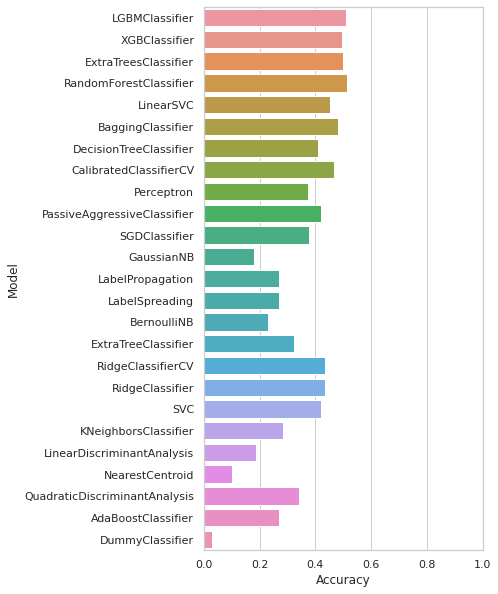

In [114]:
 # Printing all model performances
# clf1_models
clf1_models["Accuracy"] = [0 if i < 0 else i for i in clf1_models.iloc[:,0] ]
 
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=clf1_models.index, x="Accuracy", data=clf1_models)
ax.set(xlim=(0, 1))

In [115]:
# y_train

### Before proceeding and to continue on our exploratory analysis, I decide to run the k-means algorithm on my data to see its general performance.

### n of clusters = 50 (ie the Total number of US States )

In [116]:
# https://scikit-learn.org/0.15/modules/model_evaluation.html
# https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an

numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)


# print('y_train_scaled1: ',y_train_scaled1.shape)
# print('y_test_scaled1: ', y_test_scaled1.shape)
# print('X_train_scaled1: ', X_train_scaled1.shape)
# print('X_test_scaled1: ',X_test_scaled1.shape)
# print('y_train: ',y_train.shape)
# print('y_test: ', y_test.shape)

k_means=KMeans(n_clusters=50,random_state=42)

k_means.fit(X_train_scaled1,y_train_scaled1)

ypred = k_means.predict(X_test_scaled1)


y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1)
print('Confusion Matrix')
conf_matrx=multilabel_confusion_matrix(y_test_scaled1, ypred)
print(conf_matrx)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn import metrics

result = multilabel_confusion_matrix(y_test_scaled1, ypred)
print('Confusion Matrix: ')
print(result)
result1 = classification_report(y_test_scaled1, ypred)
print('Classification Report: ',)
print (result1)
result2 = accuracy_score(y_test_scaled1, ypred)
print('Accuracy: ',result2)


Confusion Matrix
[[[944  16]
  [  3   0]]

 [[940   6]
  [ 17   0]]

 [[948   3]
  [ 12   0]]

 [[897  51]
  [ 15   0]]

 [[854   9]
  [100   0]]

 [[898  51]
  [ 14   0]]

 [[948   4]
  [ 10   1]]

 [[950  10]
  [  3   0]]

 [[933  26]
  [  4   0]]

 [[906  12]
  [ 45   0]]

 [[930   0]
  [ 33   0]]

 [[913  43]
  [  7   0]]

 [[933  14]
  [ 16   0]]

 [[959   1]
  [  3   0]]

 [[928   1]
  [ 34   0]]

 [[918  35]
  [ 10   0]]

 [[911  34]
  [ 17   1]]

 [[941   6]
  [ 16   0]]

 [[916  37]
  [  8   2]]

 [[926   4]
  [ 33   0]]

 [[951   4]
  [  8   0]]

 [[919  37]
  [  6   1]]

 [[925   7]
  [ 31   0]]

 [[928  13]
  [ 22   0]]

 [[941   0]
  [ 22   0]]

 [[893  59]
  [ 11   0]]

 [[912  46]
  [  5   0]]

 [[920   3]
  [ 40   0]]

 [[935  22]
  [  6   0]]

 [[953   1]
  [  9   0]]

 [[924  34]
  [  5   0]]

 [[920  23]
  [ 20   0]]

 [[948   7]
  [  8   0]]

 [[944  13]
  [  6   0]]

 [[903   0]
  [ 60   0]]

 [[865  52]
  [ 45   1]]

 [[936  18]
  [  9   0]]

 [[919  28]
  [ 16   

In [119]:
# https://scikit-learn.org/0.15/modules/model_evaluation.html
# https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an

numeric_features = ['APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM','EFYTOTLT']
numeric_transformer = RobustScaler()


categorical_features = ['OBEREG','HDEGOFFR', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                        'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                        'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC',  
                        'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

scaler = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)
                  ]
                  )

scaler_y = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1=pd.DataFrame(X_train_scaled)
X_test_scaled1=pd.DataFrame(X_test_scaled)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

y_train_scaled1=pd.DataFrame(y_train_scaled)
y_test_scaled1=pd.DataFrame(y_test_scaled)


# print('y_train_scaled1: ',y_train_scaled1.shape)
# print('y_test_scaled1: ', y_test_scaled1.shape)
# print('X_train_scaled1: ', X_train_scaled1.shape)
# print('X_test_scaled1: ',X_test_scaled1.shape)
# print('y_train: ',y_train.shape)
# print('y_test: ', y_test.shape)

k_means=KMeans(n_clusters=9,random_state=42)

k_means.fit(X_train_scaled1,y_train_scaled1)

ypred = k_means.predict(X_test_scaled1)


y_test_scaled1 = scaler_y.inverse_transform(y_test_scaled1)


result = multilabel_confusion_matrix(y_test_scaled1, ypred)
print('Confusion Matrix: ')
print(result)
result1 = classification_report(y_test_scaled1, ypred)
print('Classification Report: ',)
print (result1)
result2 = accuracy_score(y_test_scaled1, ypred)
print('Accuracy: ',result2)



# # ONLY emphasizes poor performance of the model 
# fig, ax = plt.subplots(figsize=(30, 30))
# # Create the matrix
# cm = confusion_matrix(y_test_scaled1, ypred)
# cmp = ConfusionMatrixDisplay(cm)
# cmp.plot(ax=ax)

# plt.show();

Confusion Matrix: 
[[[934  26]
  [  3   0]]

 [[930  16]
  [ 17   0]]

 [[514 437]
  [  4   8]]

 [[944   4]
  [ 15   0]]

 [[506 357]
  [ 73  27]]

 [[885  64]
  [ 12   2]]

 [[933  19]
  [ 10   1]]

 [[958   2]
  [  3   0]]

 [[959   0]
  [  4   0]]

 [[918   0]
  [ 45   0]]

 [[930   0]
  [ 33   0]]

 [[956   0]
  [  7   0]]

 [[947   0]
  [ 16   0]]

 [[960   0]
  [  3   0]]

 [[929   0]
  [ 34   0]]

 [[953   0]
  [ 10   0]]

 [[945   0]
  [ 18   0]]

 [[947   0]
  [ 16   0]]

 [[953   0]
  [ 10   0]]

 [[930   0]
  [ 33   0]]

 [[955   0]
  [  8   0]]

 [[956   0]
  [  7   0]]

 [[932   0]
  [ 31   0]]

 [[941   0]
  [ 22   0]]

 [[941   0]
  [ 22   0]]

 [[952   0]
  [ 11   0]]

 [[958   0]
  [  5   0]]

 [[923   0]
  [ 40   0]]

 [[957   0]
  [  6   0]]

 [[954   0]
  [  9   0]]

 [[958   0]
  [  5   0]]

 [[943   0]
  [ 20   0]]

 [[955   0]
  [  8   0]]

 [[957   0]
  [  6   0]]

 [[903   0]
  [ 60   0]]

 [[917   0]
  [ 46   0]]

 [[954   0]
  [  9   0]]

 [[947   0]
  [ 16 